In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
print("Customers Dataset:")
print(customers.info())
print(customers.head())

print("\nProducts Dataset:")
print(products.info())
print(products.head())

print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

Chech For the Missing Values

In [ ]:
print("Customers:")
print(customers.isnull().sum())

print("\nProducts:")
print(products.isnull().sum())

print("\nTransactions:")
print(transactions.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
combined = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

print(combined.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [ ]:
total_revenue = combined["TotalValue"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Revenue: $689,995.56


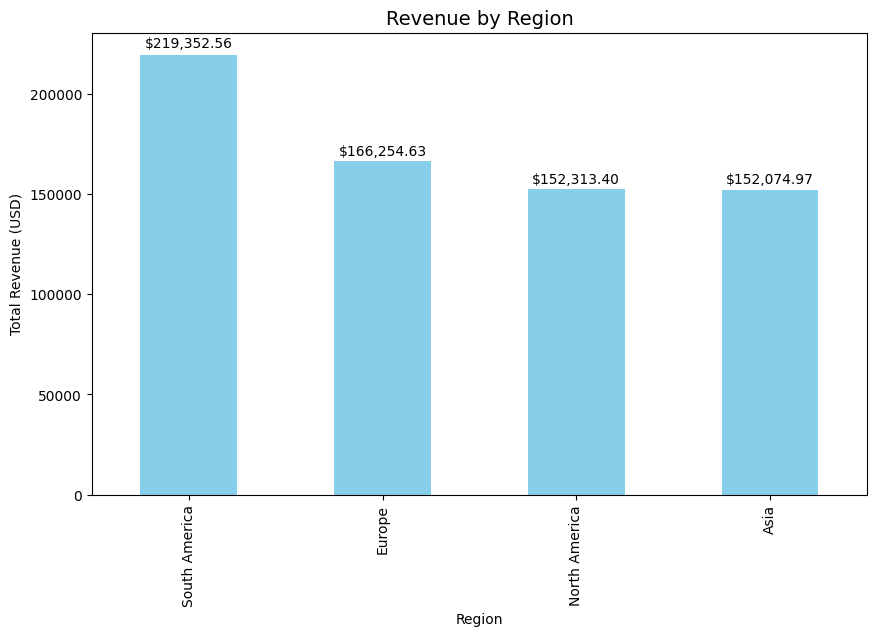

In [ ]:
region_revenue = combined.groupby('Region')["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = region_revenue.plot(kind='bar', color='skyblue')

plt.title('Revenue by Region', fontsize=14)
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Region')

for i, value in enumerate(region_revenue):
    plt.text(i, value + (value * 0.01), f'${value:,.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


<ipython-input-19-441f5c23c4b7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


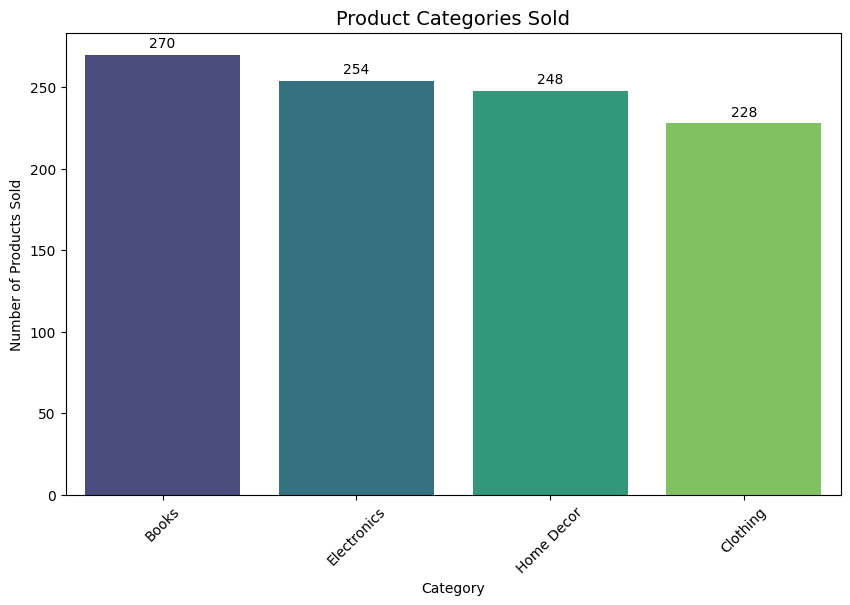

In [ ]:
category_sales = combined['Category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')

plt.title('Product Categories Sold', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)

for i, value in enumerate(category_sales.values):
    plt.text(i, value + (value * 0.01), str(value), ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
total_products_sold = combined["Quantity"].sum()
print(f"Total Number of Products Sold: {total_products_sold}")


Total Number of Products Sold: 2537


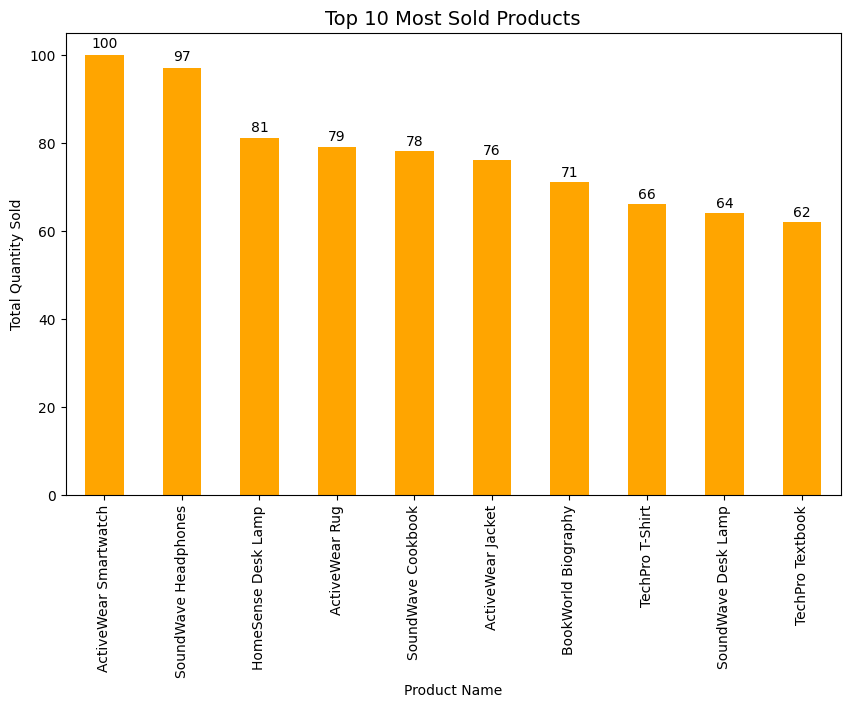

In [ ]:
top_products = combined.groupby('ProductName')["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Most Sold Products', fontsize=14)
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
for i, value in enumerate(top_products.values):
    plt.text(i, value + (value * 0.01), str(value), ha='center', va='bottom', fontsize=10)
plt.show()


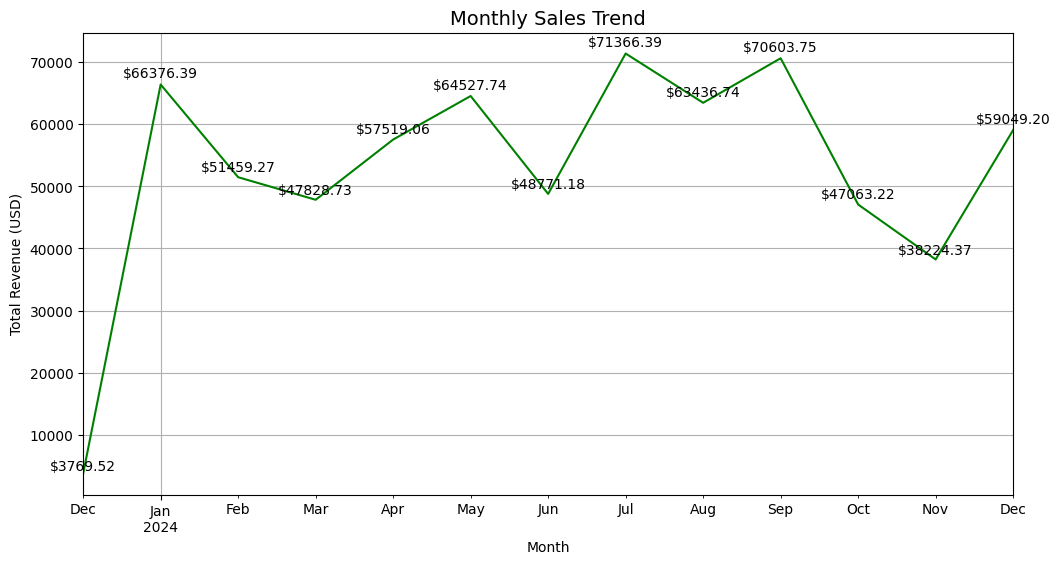

In [ ]:

combined['TransactionDate'] = pd.to_datetime(combined['TransactionDate'])
combined['Month'] = combined['TransactionDate'].dt.to_period('M')
monthly_sales = combined.groupby('Month')["TotalValue"].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='green')
plt.title('Monthly Sales Trend', fontsize=14)
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Month')
for i, value in enumerate(monthly_sales):
    plt.text(monthly_sales.index[i].to_timestamp(), value + (value * 0.01), f"${value:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid()
plt.show()

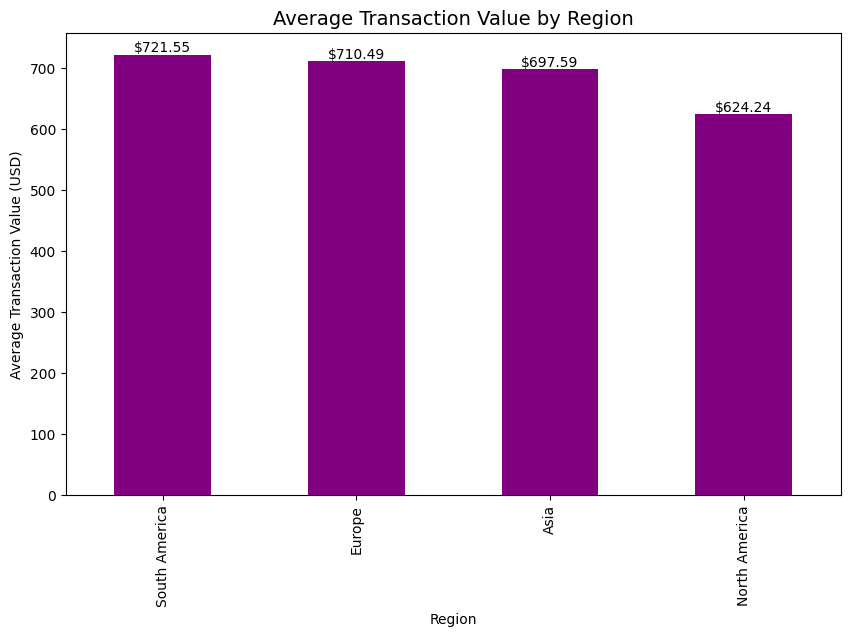

In [ ]:
avg_transaction_value = combined.groupby('Region')["TotalValue"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_transaction_value.plot(kind='bar', color='purple')
plt.title('Average Transaction Value by Region', fontsize=14)
plt.ylabel('Average Transaction Value (USD)')
plt.xlabel('Region')

for i, value in enumerate(avg_transaction_value):
    plt.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
combined.to_csv("Combined_Dataset.csv", index=False)
print("Combined dataset saved as 'Combined_Dataset.csv'")

Combined dataset saved as 'Combined_Dataset.csv'
